# Probability

Ryan Henning's lecture is based on those by Adam Richards, Tammy Lee, Lee Murray, Scott Schwartz, Matthew Drury, and other Galvanize folks.


**Afternoon**:
* Introduce expected value, variance, covariance, and correlation.
* Discuss why correlation is not causation! Reference xkcd and Anscombe's Quartet.
* Differentiate between discrete and continuous (random) variables.
* Major probability distributions
    * Discrete: Bernoulli, Binomial, Geometric, Poisson
    * Continuous: Uniform, Normal, Exponential
* Define Joint Probability Distributions
* Define Marginalization

### Expected Value
$$E(X) = \sum_{s \in S} s * P(X=s)$$

It is the possible outcomes weighted by their respective probabilities of occurring.

Intuition: the expectation is the average of infinite samples taken from a population.

### Variance

It is the expected value of $(X-E(X))^2$.

$$Var(X) = \sum_{s \in S} (s-E(X))^2 * P(X=s)$$

Variance quantifies the amount of "spread" in the possible outcomes.

The standard deviation is the square root of the variance.

<br><font color='red'><center>Why might the standard deviation be more useful than variance when talking about data?</center></font>

### Covariance and Correlation

Covariance quantifies the amount two variables are linearly associated, in the scale of the square of those units (this last part makes it hard to interpret).  If two variables are independent, their covariance is 0.

Covariance is the expected value of $(X - E(X))(Y - E(Y))$.

$$Cov(X, Y) = \dfrac{\sum_{i = 1}^n (X_i - E(X))(Y_i - E(Y))} {n-1}$$

Correlation is covariance normalized by the standard deviations of $X$ and $Y$, on a scale from -1 (perfectly negatively corrlated) to 0 (no correlation) to +1 (perfectly positively correlated).

$$Corr(X, Y) = \dfrac{\sum_{i = 1}^n (X_i - E(X))(Y_i - E(Y))} {\sqrt{ \sum_{i=1}^n (X_i - E(X))^2  \sum_{i=1}^n (Y_i - E(Y))^2 }}$$

The correlation coefficient $r$ reflects:
* noisiness and direction (line 1)
* but not slope (line 2)
* and not other non-linearities (line 3)

![](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)



<br><font color='red'><center>In the last line, all linear correlations are 0.  Does that mean the x and y values are independent?</center></font><br><br><br>

The coefficient of determination $r^2$ is the square of the correlation coefficient and ranges from [0, 1].

### Correlation Does not Imply Causation

![](https://imgs.xkcd.com/comics/correlation.png)  




## So summary statistics are all we need, right?  No need to look at the data...


mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


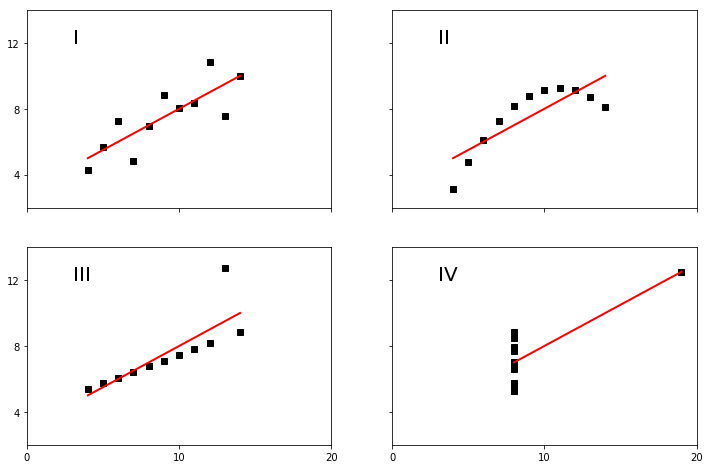

In [1]:
"""
See: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

Summary statistics are dangerous and nothing can replace actually plotting the data.
"""

import numpy as np
from numpy import array, amin, amax
import matplotlib.pyplot as plt
%matplotlib inline


def fit(x):
    return 3+0.5*x


def anscombe():
    x =  array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
    y1 = array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
    y2 = array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
    y3 = array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
    x4 = array([8,8,8,8,8,8,8,19,8,8,8])
    y4 = array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

    xfit = array( [amin(x), amax(x) ] )

    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(x,y1,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), xticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    plt.text(3,12, 'I', fontsize=20)

    plt.subplot(222)
    plt.plot(x,y2,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), xticklabels=[], yticks=(4,8,12), yticklabels=[], xticks=(0,10,20))
    plt.text(3,12, 'II', fontsize=20)

    plt.subplot(223)
    plt.plot(x,y3,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.text(3,12, 'III', fontsize=20)
    plt.setp(plt.gca(), yticks=(4,8,12), xticks=(0,10,20))

    xfit = array([amin(x4),amax(x4)])

    plt.subplot(224)
    plt.plot(x4,y4,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), yticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    plt.text(3,12, 'IV', fontsize=20)

    pairs = (x,y1), (x,y2), (x,y3), (x4,y4)
    for x,y in pairs:
        print ('mean=%1.2f, std=%1.2f, r=%1.2f'%(np.mean(y), np.std(y), np.corrcoef(x,y)[0][1]))

anscombe()

Overall, problems with only seeing the correlation:

1. It only captures linear relationship, not other relationships.
2. It doesn't capture slope at all; it only captures linear relationships (minus noise).
3. There are many dataset which have the same correlation even though they are way different.

### You can't replace the power of just plotting the data and looking at it.

## Continuous vs Discrete (Random) Variables

All above, we only talked about _discrete_ random variables (although we didn't use that term until now). However, a random variable (or a variable in general) need not be discrete. Here's the difference between _discrete_ and _continuous_: [ref](https://en.wikipedia.org/wiki/Continuous_and_discrete_variables)

**Discrete**: there is a positive, minimum difference between two values the variable can take

**Continuous**: between two values the variable can take, there are uncountably infinite other values the variable can take

Another way to put it: There are measurable "gaps" between value of a discrete variable, where the gaps between values of a continuous variable can be made infinitesimal.

### Probability Mass Function (PMF)

The PMF of a r.v. $X$ gives the probabilities of every outcome in the support $S$ of r.v. $X$. For example:

<img src="images/pmf.png" width=400px>

<br><font color='red'><center>Draw a PMF for a single random variable $X$ that is the sum of two 6-sided dice?</center></font>

### Probability Density Function (PDF)

The PDF of a r.v. $X$ gives the relative likelihood of a random variable's support. PDFs should not be interpreted the same as a PMF; with a PDF you only can interpret area-under-the-curve.

<img src="images/pdf.png" width=400px>

<br><font color='red'><center>What is the probability that I sample the r.v. and get exactly 0.0?<br>I.e. $P(X=0.0)=$ ???</center></font>

### Recall: Expectation and Variance

For **discrete** random variables (let $P$ be the PMF of the r.v. $X$):

$$E(X) = \sum_{s \in S} s * P(X=s)$$

$$Var(X) = \sum_{s \in S} (s-E(X))^2 * P(X=s)$$

For **continuous** random variables (let $f$ is the PDF of r.v. $X$):

$$E(X) = \int_{x=-\infty}^{\infty} x * f(x) dx$$

$$Var(X) = \int_{x=-\infty}^{\infty} (x-E(X))^2 * f(x) dx$$

___

<font color='red'><center>What is the difference between $E(X)$ and the mean of $X$?</center></font>

## Major Probability Distributions

All you need to build a distribution is a PMF (if discrete) or a PDF (if continuous), and define the support. For it to be legit, the PMF must be non-negative and sum to 1 over the support.

Next, you derive the mean and variance using the PMF (or PDF), the support, and the definition of mean and variance. See [this](http://filestore.aqa.org.uk/subjects/AQA-MS03-W-2-SM.PDF) (or this [local copy](misc/AQA-MS03-W-2-SM.PDF)) for a derivation of the mean and variance for all the distributions below.

### Discrete Distributions:

#### Bernoulli

$X \sim \text{Bernoulli}(p)$:  
A single coin flip turns up heads with probability $p$.

PMF: $P[success] = p$ , $P[failure] = 1-p$

Support: $\{\text{success}, \text{failure}\}$

Mean: $p$

Variance: $p (1-p)$

<img src="images/bernoulli.png" width=400px>

#### Binomial

$X \sim \text{Binomial}(n, p)$:  
The number of coin flips out of n which turn up heads. $p$ is the probability of heads for each trial.

PMF: $P[X=k] = {n \choose k} p^k (1-p)^{n-k}$

Support: $k \in \{0,1,...,n\}$

Mean: $np$

Variance: $np(1-p)$

<img src="https://upload.wikimedia.org/wikipedia/commons/7/75/Binomial_distribution_pmf.svg" width=400px>

#### Geometric

$X \sim \text{Geometric}(p)$:  
The number of trials until a coin flip turns up heads.

PMF: $P[X=k] = p(1-p)^{k-1}$

Support: $k \in \{0,1,...\}$

Mean: $\frac{1}{p}$

Variance: $\frac{1-p}{p^2}$

<img src="images/geometric.png" width=400px>

#### Poisson

$X \sim \text{Poisson}(\lambda)$:  
The number of taxis passing a street corner in a given hour (on avg, 10/hr, so $\lambda=10$).

PMF: $P[X=k] = \frac{ \lambda^k e^{-\lambda} }{ k! }$

Support: $k \in \{0,1,2,...\}$

Mean: $\lambda$

Variance: $\lambda$

<img src="https://upload.wikimedia.org/wikipedia/commons/1/16/Poisson_pmf.svg" width=400px>

This is a good time to mention the [Gambler's fallacy](https://en.wikipedia.org/wiki/Gambler%27s_fallacy). Does the Poisson distribution disagree with the fallacy?

### Continuous Distributions:

#### Uniform

$X \sim \text{Uniform}(a, b)$:  
Degrees between hour hand and minute hand ($a=0, b=360$).

PDF: $f(x) = \frac{1}{b-a}$

Support: $x \in [a, b]$

Mean: $\frac{a+b}{2}$

Variance: $\frac{(b-a)^2}{2}$

<img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Uniform_Distribution_PDF_SVG.svg" width=400px>

#### Normal (a.k.a., Gaussian)

$X \sim \text{Gaussian}(\mu, \sigma)$:  
IQ Scores (if $\mu = 100, \sigma = 10$)

PDF: $f(x) = \frac{ 1 }{ \sigma \sqrt{2 \pi} } \exp(- \frac{ (x-\mu)^2 }{ 2 \sigma^2 })$

Support: $x \in (-\infty, \infty)$

Mean: $\mu$

Variance: $\sigma^2$

<img src="https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg" width=400px>

#### Exponential

$X \sim \text{Exponential}(\lambda)$:  
Number of minutes until a taxi will pass street corner (if on average 10 taxis pass per hour; $\lambda=10/60$ the number of taxis per minute)

CDF: $f(x) = \lambda \exp(\lambda x)$

Support: $x \in [0, \infty)$

Mean: $\frac{1}{\lambda}$

Variance: $\frac{1}{\lambda^2}$

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ec/Exponential_pdf.svg" width=400px>  


#### And there are more:
http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/

### Example using scipy.stats

Let's say we have 100 products in a box where the probability of each product being defective is 5%.  What is the probability of the box containing 3 defective products?

In [ ]:
import scipy.stats as scs

# this is a binomial distribution where each "success" is a failure governed by p = 5%.

n, p, k = 100, 0.05, 3  # n total number of products, p = probability of failure, k = number of failures
prob = scs.binom.pmf(k, n, p, loc = 0) 
print("The probability the box contains {0} failures is = {1:0.3f}.".format(k,prob))

## Joint Probability Distribution

The probability of pairs of events from two (or more) random variables:

$$P(A=a, B=b)$$

If two random variables, also called a __bivariate distribution__ or if more random variables, called a __multivariate distribution__.

Always true:

$$P(A=a, B=b) = P(A=a | B=b) * P(B=b)$$

If independent:

$$P(A=a, B=b) = P(A=a) * P(B=b)$$

Always (if discrete):

$$1 = \sum_{a \in S_A} \sum_{b \in S_B} P(A=a, B=b)$$

Always (if continuous):

$$1 = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(a, b) \, da \, db$$

## Marginalization

Marginalization takes a (possibly _dependent_) multivariate distribution and considers only a single variable using the _Law of Total Probability_.

Accomplished by summing (if discrete) or integrating (if continuous).

**If continuous:**

$$f_X(x) = \int_{-\infty}^\infty f_{XY}(x,s) ds$$

![](https://upload.wikimedia.org/wikipedia/commons/8/8e/MultivariateNormal.png)

**If discrete:**

$$P(X) = \sum_{y \in S_Y} P(X, Y=y)$$

||x1|x2|x3|x4|py(Y)|
|---|---|---|---|---|
|**y1**|$\frac{4}{32}$|$\frac{2}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$|
|**y2**|$\frac{2}{32}$|$\frac{4}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$|
|**y3**|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{8}{32}$|
|**y4**|$\frac{8}{32}$|0|0|0|$\frac{8}{32}$|
|**px(X)**|$\frac{16}{32}$|$\frac{8}{32}$|$\frac{4}{32}$|$\frac{4}{32}$|1|
